# Big Data Final Project
> by Devin Ingersoll

Using pyspark, import a txt file and map, filter, clean, and reduce the data into a list of the most used words.

In [0]:
# First import the data into pyspark
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/deviningers/big-data-final/main/neuro.txt" , "/tmp/neuro.txt")

# bring the file into databricks
dbutils.fs.mv("file:/tmp/neuro.txt", "dbfs:/data/neuro.txt")

# bring the file into a Resilient Distributed Datasets (RDD)
nServers = 4
txtRDD = sc.textFile("/data/neuro.txt", nServers)

In [0]:
# Flatten out the file into individual words (& symbols) using flatMap
wordsRDD = txtRDD.flatMap(lambda line : line.lower().strip().split(" "))

In [0]:
# Clean the data
import re
# Remove all symboles using regex from each word
textWordsRDD = wordsRDD.map(lambda w: re.sub(r'[^a-zA-Z]','',w))

# Remove all stopwords using pyspark's stopword remover function
# prepair stopwords
from pyspark.ml.feature import StopWordsRemover
remover = StopWordsRemover()
stopwords = remover.getStopWords()
# now lets remove the stopwords using filter
cleanRDD=textWordsRDD.filter(lambda w: w not in stopwords)

# Let's do some additional cleaning of names and other unimportant words (a little cheating but can you make a story with these words?)
removeWords = ['case', 'molly', 'armitage', 'maelcum', 'riviera', 'finn', 'said', '', 'like', 'youre', 'something', 'thing' , 'get', 'got', 'dont']
cleanerRDD=cleanRDD.filter(lambda w: w not in removeWords)


In [0]:
# map words to intermediate key-value pairs
IKVPairsRDD = cleanerRDD.map(lambda word: (word,1))
# reduceByKey to word, count (sum)
wordCountRDD = IKVPairsRDD.reduceByKey(lambda acc, value: acc+value)

In [0]:
# Collect the results and transform the data into a list of the top 20
results = wordCountRDD.collect()
results.sort(key=lambda x:x[1])
results.reverse()
print(results[:20])

# output the array into a tuple that can be used to graph
top=results[0:20]
word,count = zip(*top)

[('one', 263), ('back', 225), ('know', 181), ('hed', 174), ('eyes', 164), ('man', 140), ('black', 132), ('white', 125), ('hand', 111), ('across', 110), ('face', 106), ('head', 106), ('way', 101), ('saw', 98), ('time', 97), ('dark', 96), ('around', 95), ('left', 95), ('see', 92), ('old', 92)]

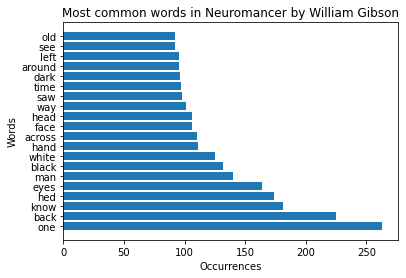

In [0]:
# graph the data using matplotlib
import matplotlib.pyplot as plt
fig = plt.figure()
plt.barh(word,count)
plt.xlabel("Occurrences")
plt.ylabel("Words")
plt.title("Most common words in Neuromancer by William Gibson")
plt.show()